In [ ]:
# para la lección de hoy tendremos que instalar la siguiente librería. Recordad eliminar "#"
# !pip install scipy

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("./files/bank-additional-clean-nonulls.csv", index_col=0)
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,37.000000,4.857000,7.0
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,40.000000,3.595488,2.8
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,56.000000,3.602722,5.8


In [4]:
# Medidas de centralización
# -----------------------------------------------------------------------
# Media
df_ingresos = df["income"].mean()
df_ingresos

## Mediana
df_ingresos_mediana = df["income"].median()

## Moda
df_ingresos_moda = df["income"].mode()

In [21]:
# Medidas de dispersión
# -----------------------------------------------------------------------

media_ingresos = df["income"].mean()

# Varianza
varianza_ingresos = df["income"].var()

## Desviación estándar
desviacion_estandar_ingresos = df["income"].std()

print(f"La media de los ingresos de los clientes es: {np.round(media_ingresos, 2)}")
print(f"La varianza de los ingresos de los clientes es: {np.round(varianza_ingresos, 2)}")
print(f"La desviación estándar de los ingresos de los clientes es: {np.round(desviacion_estandar_ingresos, 2)}")


La media de los ingresos de los clientes es: 93241.2
La varianza de los ingresos de los clientes es: 2550079937.2
La desviación estándar de los ingresos de los clientes es: 50498.32


In [ ]:
from itertools import combinations

# Medidas de correlación

# - Spearman: relación no lineal entre las variables
# - Pearson: relación linean entre las variables, si cambia una, cambia la otra
# - Kendall: relación de orden entre las variables


# combinaciones de variables numericas
numericas = df.select_dtypes(include=[np.number]).columns
numericas

## usar el metodo combinations
combinaciones = list(combinations(numericas, 2))
combinaciones


In [24]:
numericas

Index(['income', 'kidhome', 'teenhome', 'numwebvisitsmonth', 'duration',
       'campaign', 'previous', 'empvarrate', 'conspriceidx', 'consconfidx',
       'latitude', 'longitude', 'contact_year', 'age', 'euribor3m', 'pdays'],
      dtype='object')

In [3]:
df_corr = df.corr(method="spearman", numeric_only=True)
df_corr

,income,kidhome,teenhome,numwebvisitsmonth,duration,campaign,previous,empvarrate,conspriceidx,consconfidx,latitude,longitude,contact_year,age,euribor3m,pdays
income,1.000000,0.001324,0.006487,0.002504,0.000232,0.006174,0.000933,-0.006900,-0.011501,0.000356,-0.004433,0.000374,-0.003602,0.003490,-0.001756,0.009223
kidhome,0.001324,1.000000,-0.001353,-0.005612,-0.003467,0.003005,-0.003948,-0.003666,0.001631,-0.004570,-0.002130,0.002334,-0.006232,0.000136,-0.002849,0.009427
teenhome,0.006487,-0.001353,1.000000,-0.002801,-0.002008,0.001433,0.000582,0.000864,0.004161,0.000331,-0.001550,-0.001425,-0.012767,0.000332,-0.003539,-0.000169
numwebvisitsmonth,0.002504,-0.005612,-0.002801,1.000000,0.008602,0.003152,-0.002181,-0.007394,-0.003013,0.006337,0.002823,-0.002216,0.005978,-0.006298,-0.005031,0.000651
duration,0.000232,-0.003467,-0.002008,0.008602,1.000000,-0.080843,0.043158,-0.068606,0.003272,-0.007817,-0.002437,0.002615,-0.004096,-0.001591,-0.069951,0.000917
campaign,0.006174,0.003005,0.001433,0.003152,-0.080843,1.000000,-0.088285,0.156665,0.098177,-0.000443,-0.005869,0.002948,-0.003064,0.005609,0.118690,0.007516
previous,0.000933,-0.003948,0.000582,-0.002181,0.043158,-0.088285,1.000000,-0.434810,-0.279919,-0.113894,0.012975,-0.010237,-0.000743,-0.014826,-0.420971,-0.003728
empvarrate,-0.006900,-0.003666,0.000864,-0.007394,-0.068606,0.156665,-0.434810,1.000000,0.662170,0.222928,-0.009862,0.001162,0.004128,0.054459,0.817413,-0.045358
conspriceidx,-0.011501,0.001631,0.004161,-0.003013,0.003272,0.098177,-0.279919,0.662170,1.000000,0.240178,-0.003901,-0.003506,0.008652,0.050600,0.480155,-0.035443
consconfidx,0.000356,-0.004570,0.000331,0.006337,-0.007817,-0.000443,-0.113894,0.222928,0.240178,1.000000,-0.006531,0.008628,-0.004249,0.109790,0.247492,-0.038176


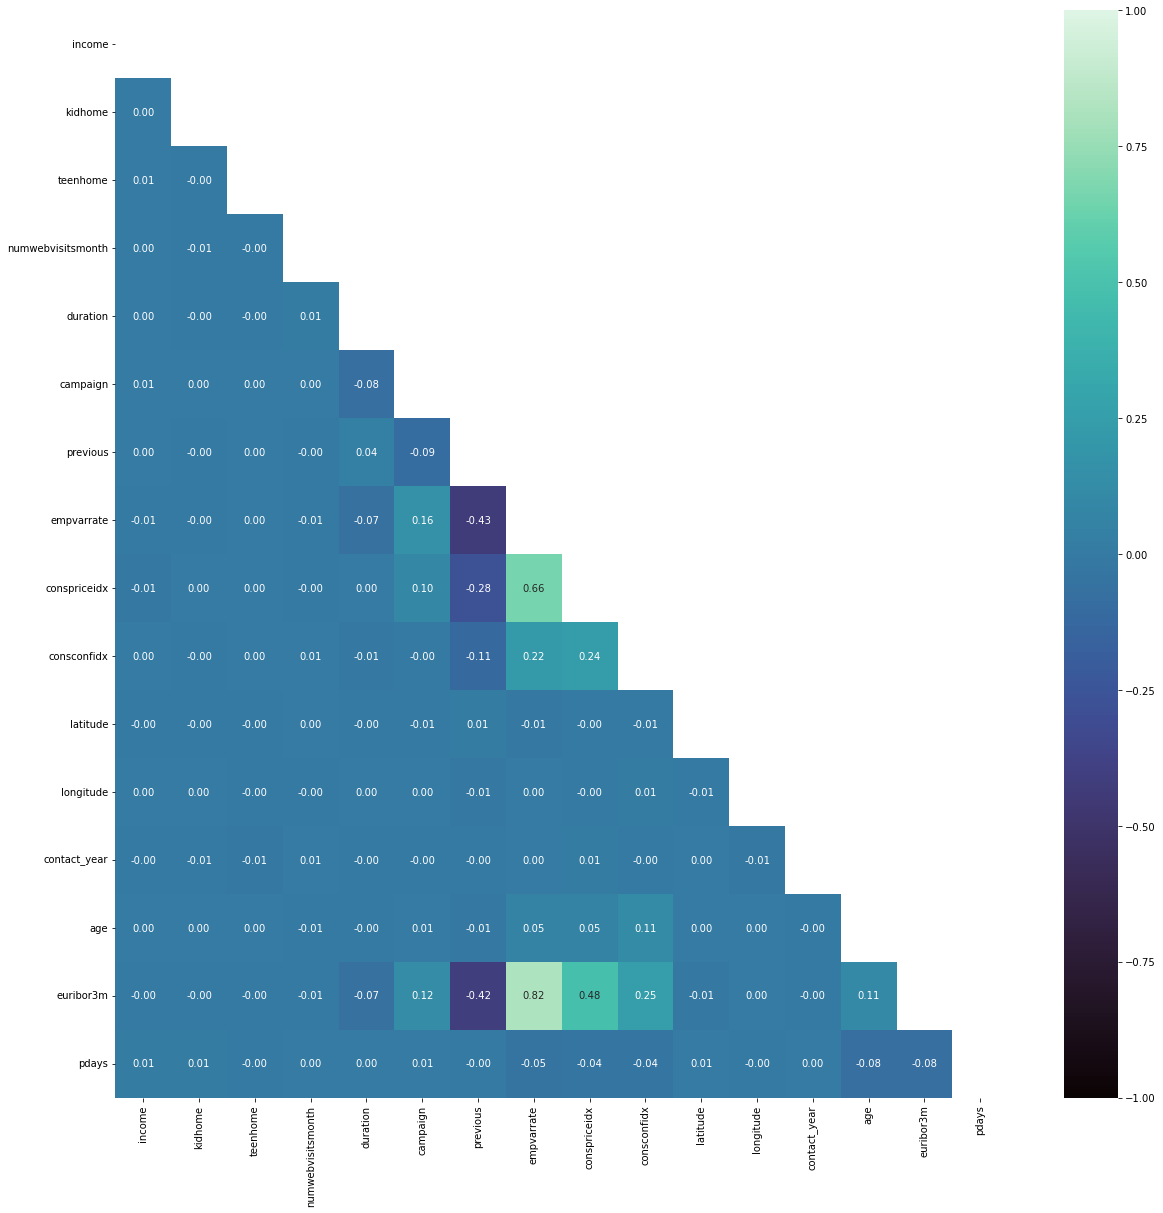

In [8]:
plt.figure(figsize=(20, 20))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f",
            cmap="mako", 
            vmax=1,
            vmin=-1, 
            mask= mask );
# Correlacion Débil: es cuando el r es menor a 0.3
# Correlacion Moderada: es cuando el r es entre 0.3 y 0.7
# Correlacion Fuerte: es cuando el r es mayor a 0.7

In [9]:
## Medidas categóricas

# frecuencia absoluta
frecuencia_absoluta   = df['marital'].value_counts();

# frecuencia relativa
frecuencia_relativa   = df['marital'].value_counts(normalize=True)*100;

# tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Estado Civil': frecuencia_absoluta.index,
    "Frecuencia Absoluta": frecuencia_absoluta,
    "Frecuencia Relativa %": frecuencia_relativa
})

tabla_frecuencias



,Estado Civil,Frecuencia Absoluta,Frecuencia Relativa %
married,married,25999,60.462791
single,single,12105,28.151163
divorced,divorced,4811,11.188372
noviembre,noviembre,85,0.197674


In [12]:
# crosstab
tabla_contigencia_1 = pd.crosstab(df['marital'], df['education'], normalize=True)*100
tabla_contigencia_1

education,Unknown,basic 4y,basic 6y,basic 9y,high school,illiterate,professional course,university degree
marital,,,,,,,,
divorced,0.444186,1.200000,0.441860,1.376744,2.883721,0.004651,1.602326,3.234884
married,2.576744,7.827907,4.286047,10.072093,12.493023,0.034884,7.662791,15.509302
noviembre,0.020930,0.013953,0.016279,0.020930,0.034884,0.000000,0.016279,0.074419
single,1.160465,1.088372,0.804651,3.202326,7.669767,0.002326,3.455814,10.767442
